In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read, write
from dynasor.qpoints import get_spherical_qpoints
from dynasor import compute_static_structure_factors, Trajectory
from dynasor.post_processing import get_spherically_averaged_sample_smearing 
from dynasor import read_sample_from_npz
from dynasor.post_processing import XRayFormFactors
from dynasor.post_processing import get_weighted_sample
import pandas as pd
import mplpub
mplpub.setup(template='acs') 
import os

/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# MD 


In [2]:
data_dict_qwidths = dict()

xlim = [1, 4.0]
for temp in np.arange(100,1200,50):
    os.chdir('/Users/prakriti/2024_BaZrS3_Phase_Transitions/data/')
    sample_averaged = read_sample_from_npz(f'sample_temp{temp}.npz')
    xrff = XRayFormFactors(sample_averaged.atom_types)
    sample_weighted = get_weighted_sample(sample_averaged, xrff)

    # convert q to theta
    lam = 1.5406
    n = 1
    theta = np.arcsin(n * sample_averaged.q_norms * lam / 4 / np.pi) * 180 / np.pi
    data_dict_qwidths[temp] = sample_weighted.q_norms, sample_weighted.Sq

0.8868029816683366 6.241501695569227
1.9829517496599005 14.069816031328852
2.6604089450050092 19.035764743733786
1.5359878205531305 10.854032937139824
2.3462601514049894 16.716992850577864
2.9411927531622903 21.135916079126996
0.6270644019141304 4.409034688979524
1.8811932057423912 13.334091262817608
1.4021586289502448 9.898337447583057
2.2609128541195562 16.09204482691004
1.8811932057423912 13.334091262817608
2.5854527631567246 18.479714793510997


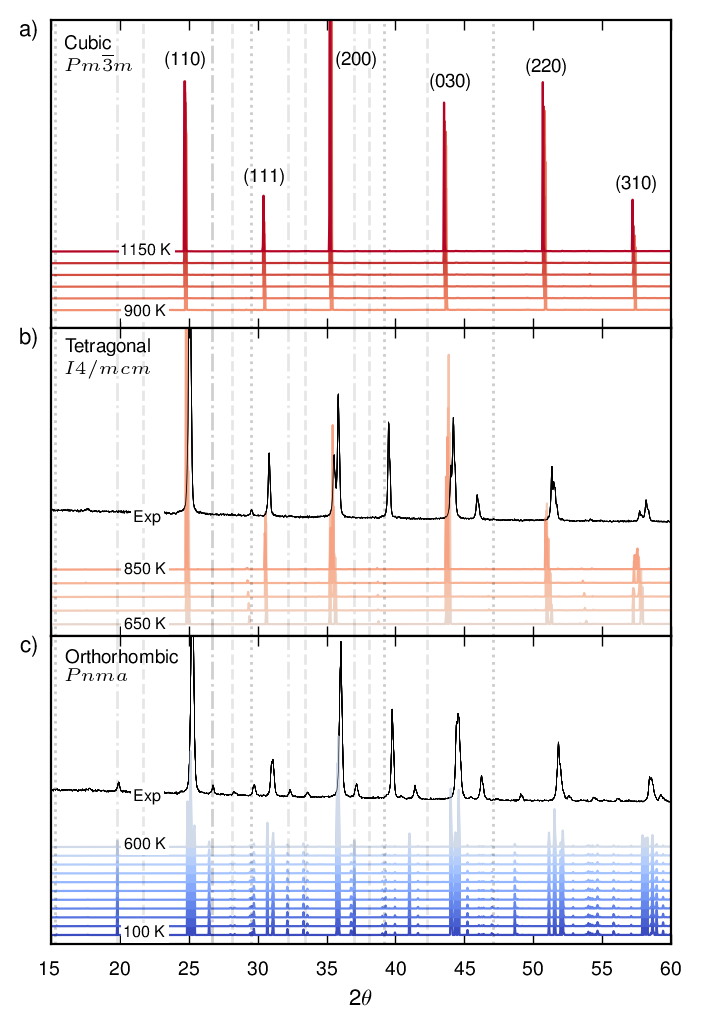

In [3]:
alpha = 0.5
df_exp = pd.read_csv('/Users/prakriti/2024_BaZrS3_Phase_Transitions/data/XRD_exp.csv') 
total_n=23
lin = [i for i in np.linspace(0, 1, total_n)]
ortho = lin[0:12]
tet = lin[12:17]
cub = lin[17:23]
alat=5.01
count = 1
n = 22 
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(4.0, 6.0), dpi=200, sharex=True)
fig.subplots_adjust(hspace=0,wspace=0)
ax3.set_prop_cycle('color',[plt.cm.coolwarm(i) for i in ortho])
ax2.set_prop_cycle('color',[plt.cm.coolwarm(i) for i in tet])
ax1.set_prop_cycle('color',[plt.cm.coolwarm(i) for i in cub])
for temp, (q, Sq) in data_dict_qwidths.items():
    #print(temp)
    theta = np.arcsin(q * 1.5406 / 4 / np.pi) * 180 / np.pi
    if temp <= 600:
        count = count+4000
        ax3.plot(2*theta, Sq+(count), '-', label=rf'{temp}', lw=0.8)
        #ax3.set_yscale('log')
        ax3.plot(df_exp['2Theta'], df_exp['Ortho']*5.5+60000, color = 'k', lw=0.2, alpha = 1)
        ax3.set_ylim([1,140000])
    elif 600 < temp < 900:
        count = count+6000
        ax2.plot(2*theta, Sq+(count), '-', label=rf'{temp}', lw=0.8)
        #ax2.set_yscale('log')
        ax2.plot(df_exp['2Theta'], df_exp['Tetrag']*5.5+90000, color = 'k', lw=0.3, alpha = 1)
        ax2.set_ylim([45000,180000])
    elif temp >= 900:
        count = count+8000
        ax1.plot(2*theta, Sq+(count), '-', label=rf'{temp}', lw=0.8)
        #ax1.set_yscale('log')
        ax1.set_xlim([15,60])
        ax1.set_ylim([70000,280000])

list_q = [[0.5, 0.5, 0.5], [0.5, 0.5, 1.5], [0.5, 0.5, 2.5], [.5, 0.5, 3.5], [0.5, 1.5, 1.5], [0.5, 1.5, 2.5], [0.5, 1.5, 3.5], [0.5, 2.5, 2.5], [0.5, 2.5, 3.5], [0.5, 3.5, 3.5], [1.5, 1.5, 1.5], [1.5, 1.5, 2.5], [1.5, 1.5, 3.5], [1.5, 2.5, 2.5], [1.5, 2.5, 3.5], [1.5, 3.5, 3.5], [2.5, 2.5, 2.5], [2.5, 3.5, 3.5], [3.5, 3.5, 3.5]] 
list_q = [[0.5, 0.5, 0.5], [0.5, 0.5, 1.5], [0.5, 1.5, 1.5], [1.5, 1.5, 1.5]]


for i in list_q:
    q_vals = 2 * np.pi / alat * np.linalg.norm([i])
    d_spacing = 2 * np.pi / q_vals
    theta = np.arcsin(q_vals * 1.5406 / 4 / np.pi) * 180 / np.pi
    ax1.axvline(x=2*theta, ls=':' , color= 'k' , alpha=alpha-0.3)
    ax2.axvline(x=2*theta, ls=':' , color= 'k' , alpha=alpha-0.3)
    ax3.axvline(x=2*theta, ls=':' , color= 'k' , alpha=alpha-0.3)
list_q = [[0. , 0.5, 0.5], [0. , 0.5, 1.5], [0. , 1.5, 1.5], [0.5, 0.5, 1. ], [0.5, 1. , 1.5], [1. , 1.5, 1.5]]
for i in list_q:
    q_vals = 2 * np.pi / alat * np.linalg.norm([i])
    d_spacing = 2 * np.pi / q_vals
    theta = np.arcsin(q_vals * 1.5406 / 4 / np.pi) * 180 / np.pi
    print(q_vals, theta)
    ax1.axvline(x=2*theta, ls='--' , color= 'k' , alpha=alpha-0.4)
    ax2.axvline(x=2*theta, ls='--' , color= 'k' , alpha=alpha-0.4)
    ax3.axvline(x=2*theta, ls='--' , color= 'k' , alpha=alpha-0.4)

list_q = [[0. , 0. , 0.5], [0. , 0. , 1.5], [0. , 0.5, 1. ], [0. , 1. , 1.5], [0.5, 1. , 1. ], [1. , 1. , 1.5]]
for i in list_q:
    q_vals = 2 * np.pi / alat * np.linalg.norm([i])
    d_spacing = 2 * np.pi / q_vals
    theta = np.arcsin(q_vals * 1.5406 / 4 / np.pi) * 180 / np.pi
    print(q_vals, theta)
    ax1.axvline(x=2*theta, ls='dashdot' , color= 'k' , alpha=alpha-0.4)
    ax2.axvline(x=2*theta, ls='dashdot' , color= 'k' , alpha=alpha-0.4)
    ax3.axvline(x=2*theta, ls='dashdot' , color= 'k' , alpha=alpha-0.4)

ax3.set_xlabel(r"2${\theta}$")
ax1.set_yticklabels([])
ax1.yaxis.set_ticks_position('none')
ax2.set_yticklabels([])
ax2.yaxis.set_ticks_position('none')
ax3.set_yticklabels([])
ax3.yaxis.set_ticks_position('none')
ax1.text(16.2,2500,"(100)",fontsize=6.8)
ax1.text(23.3,250000,"(110)", fontsize=6.8)
ax1.text(29,170000,"(111)", fontsize=6.8)
ax1.text(35.7,250000,"(200)", fontsize=6.8)
ax1.text(38,400,"(210)", fontsize=6.8)
ax1.text(42.5,235000,"(030)", fontsize=6.8)
ax1.text(49.5,245000,"(220)", fontsize=6.8)
ax1.text(52.2,380,"(221)", fontsize=6.8)
ax1.text(56,165000,"(310)", fontsize=6.8)
ax1.text(16,260000, r'Cubic', fontsize=6.8)
ax1.text(16,245000, r'$\UG{Pm\overline{3}m}$', fontsize=6.8)
ax2.text(16,170000, r'Tetragonal', fontsize=6.8)
ax2.text(16,160000, r'$\UG{I4/mcm}$', fontsize=6.8)
ax3.text(16,128000, r'Orthorhombic',fontsize=6.8)
ax3.text(16,120000, r'$\UG{Pnma}$', fontsize=6.8)
ax1.text(-0.05, 0.95, 'a)', transform=ax1.transAxes, fontsize = 8)
ax2.text(-0.05, 0.95, 'b)', transform=ax2.transAxes, fontsize = 8)
ax3.text(-0.05, 0.95, 'c)', transform=ax3.transAxes, fontsize = 8)
bbox = dict(facecolor='w', edgecolor='none', alpha=1.0, pad=1.0)
ax1.text(20.3,78000,"900 K", fontsize=5.8,bbox=bbox)
ax1.text(20.1,120000,"1150 K", fontsize=5.8,bbox=bbox)
ax2.text(20.3,72000,"850 K", fontsize=5.8,bbox=bbox)
ax2.text(20.3,48000,"650 K", fontsize=5.8,bbox=bbox)
ax3.text(20.3,43000,"600 K", fontsize=5.8,bbox=bbox)
ax3.text(20.3,3000,"100 K", fontsize=5.8,bbox=bbox)
ax3.text(21,65000,"Exp", fontsize=5.8,bbox=bbox)
ax2.text(21,95000,"Exp", fontsize=5.8,bbox=bbox)
ax2.set_xlim([15, 60])
ax2.set_xticks([15,20,25,30,35,40,45,50,55,60])
ax2.set_xticklabels(['15','20','25','30','35','40','45','50','55','60'])
#ax2.set_xlabel(r"2${\theta}$")
#ax3.set_xticks([18,24,30,36,42,48,54,60])
#ax3.set_xticklabels(['18','24','30','36','42','48','54','60'])
plt.subplots_adjust(hspace=0)
fig.savefig('/Users/prakriti/2024_BaZrS3_Phase_Transitions/figs/XRD.png', bbox_inches = 'tight')